In [ ]:
# % of Exports is in Financial services
# Country	Most Recent Year	Most Recent Value	
# Hong Kong SAR, China	2018	22	
# Singapore	2018	18

In [ ]:
# plot of top 10 trading partners of financial services, to see how money shifted
# retain original mapping/location
# general HK situ: increase in green, decrease in red
# specifically HK to SG: HK retain green, SG gain red

In [4]:
import pandas as pd
financialservices_HK = pd.read_csv("financialservices_HK.csv", encoding='latin-1')
financialservices_SG = pd.read_csv("financialservices_SG.csv", encoding='latin-1')

In [13]:
merged_df = pd.merge(financialservices_HK, financialservices_SG, on='Importers', suffixes=('_HK', '_SG'))
joined_df = merged_df[1:].head(10) # top 10 overlapping financial services consumers for HK & SG by Export value

In [14]:
joined_df

,Importers,Exported value in 2010_HK,Exported value in 2011_HK,Exported value in 2012_HK,Exported value in 2013_HK,Exported value in 2014_HK,Exported value in 2015_HK,Exported value in 2016_HK,Exported value in 2017_HK,Exported value in 2018_HK,...,Exported value in 2010_SG,Exported value in 2011_SG,Exported value in 2012_SG,Exported value in 2013_SG,Exported value in 2014_SG,Exported value in 2015_SG,Exported value in 2016_SG,Exported value in 2017_SG,Exported value in 2018_SG,Exported value in 2019_SG
1,China,210291123,246581687,284360806,320687678,300429691,287492809,285501329,297814126,314293501,...,36361069,42692809,44255388,49262161,54694071,51421809,44351818,54038553,50411435,51615430
2,United States of America,42816343,42660146,43694387,42761432,44151112,44348749,42031390,42421550,45872085,...,22951030,22205372,22415799,23262563,23145422,23225800,22754003,24183047,31866661,34407392
3,India,9923839,12363011,11057065,11130036,13015340,13272849,15398174,21070302,17901904,...,13409643,14322343,11816212,11450712,11496312,10993606,10036103,11017885,12333262,11443533
4,Japan,16496752,17425680,18567228,17479092,17103149,15945604,15055656,16513328,16533395,...,16410345,18373433,18082348,17578303,16746659,15287522,14562068,17056689,19993261,17634621
5,"Taipei, Chinese",9309598,11621624,10846166,10663460,10918108,8906271,10185130,12246780,11733116,...,12981846,14603664,14451128,15296587,16139786,14442133,14734569,16609345,16952077,16387429
6,Thailand,4912268,6224862,6091807,7146363,7763171,8693581,10071897,13388245,13449394,...,12704219,14124826,16013194,15367090,15530791,14081112,13765782,14691352,15555421,15354258
7,Viet Nam,4387071,6001942,6555872,9436138,8676365,9927905,9355556,10245801,10659940,...,7393212,10141844,10087067,10331483,12223901,12122442,11353589,12294274,12025434,12960810
8,Germany,10419447,11620593,10033068,9519415,9367970,9088958,8649425,9487722,9720546,...,6150566,6689559,5955296,5841149,5388968,5548920,5734625,6195374,6413351,5846247
9,Netherlands,5678982,5429114,5342133,5400098,6096961,6730208,7398224,8210054,9112252,...,6163621,7547694,7104740,6418273,7290483,6196904,6905151,7813722,8915511,8596404
10,United Kingdom,9751122,7542949,7354356,7104740,7232363,7114433,11189250,9326270,6401858,...,6123775,6943239,6537987,3845584,4007523,3314623,3141488,3054262,4754358,4666073


In [34]:
HK_to_SG = financialservices_HK[financialservices_HK['Importers']=='Singapore']
HK_to_SG

,Importers,Exported value in 2010,Exported value in 2011,Exported value in 2012,Exported value in 2013,Exported value in 2014,Exported value in 2015,Exported value in 2016,Exported value in 2017,Exported value in 2018,Exported value in 2019
6,Singapore,7187684,7658850,8147056,8671039,8122522,9776405,9383092,11204180,12331276,10769822


In [33]:
SG_to_HK = financialservices_SG[financialservices_SG['Importers']=='Hong Kong, China']
SG_to_HK

,Importers,Exported value in 2010,Exported value in 2011,Exported value in 2012,Exported value in 2013,Exported value in 2014,Exported value in 2015,Exported value in 2016,Exported value in 2017,Exported value in 2018,Exported value in 2019
2,"Hong Kong, China",41272856,45053157,46312278,46061285,45806225,41130296,43261080,46010513,48629673,44374755


In [105]:
joined_df.columns[-2]
# HK_to_SG.iloc[0,10]

'Exported value in 2018_SG'

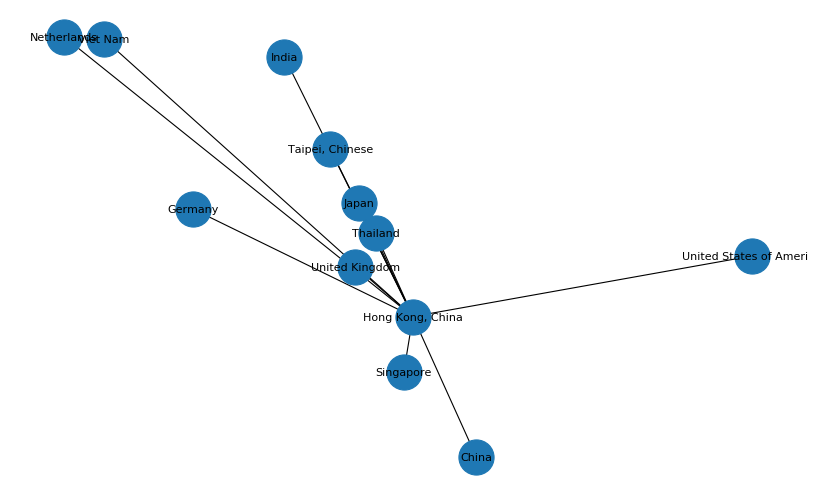

In [73]:
# HK, 2019

import networkx as nx 
import matplotlib.pyplot as plt
import itertools

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')

G = nx.Graph() 
# G1 = nx.Graph()
# adj_list = {2: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# 3: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# 5: [2, 3, 4, 5, 6, 7, 8, 9]}
# import matplotlib.pyplot as plt 
# for i, j in adj_list.items():
#     for k in j:
#         G.add_edge(i, k)  

for index, row in joined_df.iterrows():
    G.add_edge("Hong Kong, China",row[joined_df.columns[0]], weight=row[joined_df.columns[10]])
    
G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10])
    
# G.add_edge(1,2, weight=1)

pos = nx.spring_layout(G, k=0.15,iterations=50)
# pos = nx.spring_layout(G, scale=5,k=0.15,iterations=20)   #<<<<<<<<<< Initialize this only once
nx.draw(G,pos=pos, with_labels=True, node_size = 1000, font_size=10)  #<<<<<<<<< pass the pos variable
plt.draw() 
# plt.figure() # To plot the next graph in a new figure
# plt.show()

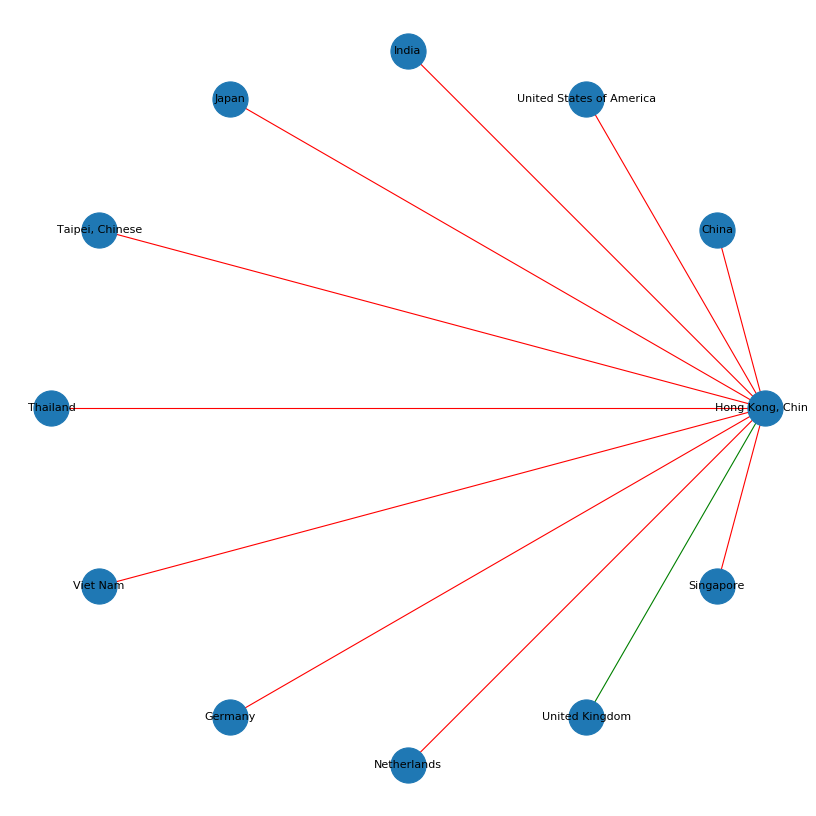

In [114]:
# HK, 2018 to 2019, color red if lose business and green if gain business

import networkx as nx 
import matplotlib.pyplot as plt
import itertools

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

G = nx.Graph() 
# G1 = nx.Graph()
# adj_list = {2: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# 3: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# 5: [2, 3, 4, 5, 6, 7, 8, 9]}
# import matplotlib.pyplot as plt 
# for i, j in adj_list.items():
#     for k in j:
#         G.add_edge(i, k)  

for index, row in joined_df.iterrows():
    if row[joined_df.columns[10]]-row[joined_df.columns[9]]>0:
        G.add_edge("Hong Kong, China",row[joined_df.columns[0]], weight=row[joined_df.columns[10]], color='green')
    if row[joined_df.columns[10]]-row[joined_df.columns[9]]<0:
        G.add_edge("Hong Kong, China",row[joined_df.columns[0]], weight=row[joined_df.columns[10]], color='red')
    
if HK_to_SG.iloc[0,10]-HK_to_SG.iloc[0,9]>0:
    G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color='green')
if HK_to_SG.iloc[0,10]-HK_to_SG.iloc[0,9]<=0:
    G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color='red')
# G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color='red')
    
# G.add_edge(1,2, weight=1)

# pos = nx.spring_layout(G, k=0.15,iterations=50)
pos = nx.circular_layout(G)
# pos = nx.spring_layout(G, scale=5,k=0.15,iterations=20)   #<<<<<<<<<< Initialize this only once
# nx.draw(G,pos=pos, with_labels=True, node_size = 1000, font_size=10)  #<<<<<<<<< pass the pos variable
# plt.draw() 
# plt.figure() # To plot the next graph in a new figure
# plt.show()

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos=pos, with_labels=True, node_size = 1000, font_size=10, edges=edges, edge_color=colors)

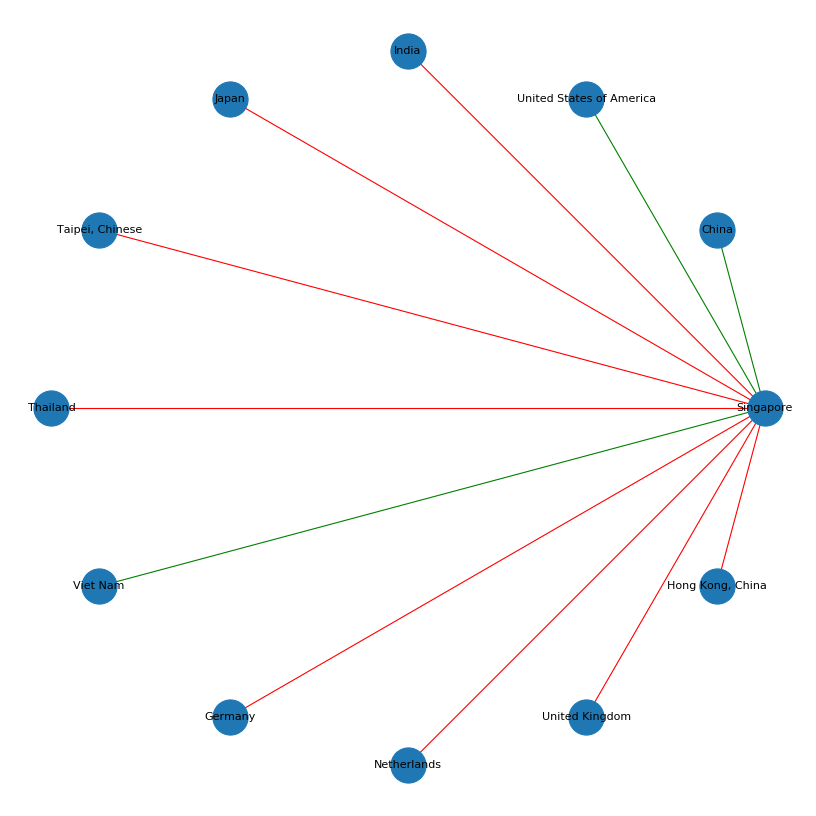

In [113]:
# SG, 2018 to 2019, color red if lose business and green if gain business

import networkx as nx 
import matplotlib.pyplot as plt
import itertools

from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

G = nx.Graph() 
# G1 = nx.Graph()
# adj_list = {2: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# 3: [2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 14],    
# 5: [2, 3, 4, 5, 6, 7, 8, 9]}
# import matplotlib.pyplot as plt 
# for i, j in adj_list.items():
#     for k in j:
#         G.add_edge(i, k)  

for index, row in joined_df.iterrows():
    if row[joined_df.columns[-1]]-row[joined_df.columns[-2]]>0:
        G.add_edge("Singapore",row[joined_df.columns[0]], weight=row[joined_df.columns[-1]], color='green')
    if row[joined_df.columns[-1]]-row[joined_df.columns[-2]]<0:
        G.add_edge("Singapore",row[joined_df.columns[0]], weight=row[joined_df.columns[-1]], color='red')
    
if SG_to_HK.iloc[0,10]-SG_to_HK.iloc[0,9]>0:
    G.add_edge("Singapore",SG_to_HK.iloc[0,0], weight=SG_to_HK.iloc[0,10], color='green')
if SG_to_HK.iloc[0,10]-SG_to_HK.iloc[0,9]<=0:
    G.add_edge("Singapore",SG_to_HK.iloc[0,0], weight=SG_to_HK.iloc[0,10], color='red')
# G.add_edge("Hong Kong, China",HK_to_SG.iloc[0,0], weight=HK_to_SG.iloc[0,10], color='red')
    
# G.add_edge(1,2, weight=1)

# pos = nx.spring_layout(G, k=0.15,iterations=50)
pos = nx.circular_layout(G)
# pos = nx.spring_layout(G, scale=5,k=0.15,iterations=20)   #<<<<<<<<<< Initialize this only once
# nx.draw(G,pos=pos, with_labels=True, node_size = 1000, font_size=10)  #<<<<<<<<< pass the pos variable
# plt.draw() 
# plt.figure() # To plot the next graph in a new figure
# plt.show()

edges = G.edges()
colors = [G[u][v]['color'] for u,v in edges]
weights = [G[u][v]['weight'] for u,v in edges]

nx.draw(G, pos=pos, with_labels=True, node_size = 1000, font_size=10, edges=edges, edge_color=colors)